In [54]:
import pandas as pd

myData = pd.read_csv('MBTI_DataSet.csv')




myData.head()



,p_types,comments
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [55]:
myData.tail()

,p_types,comments
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...
8671,ENFP,'So...if this thread already exists someplace ...
8672,INTP,'So many questions when i do these things. I ...
8673,INFP,'I am very conflicted right now when it comes ...
8674,INFP,'It has been too long since I have been on per...


In [56]:
myData.describe(include=['object'])

,p_types,comments
count,8675,8675
unique,16,8675
top,INFP,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
freq,1832,1


In [57]:
myData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   p_types   8675 non-null   object
 1   comments  8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


In [58]:
myData.shape

(8675, 2)

In [59]:
myData.isnull().any()

p_types     False
comments    False
dtype: bool

In [60]:
import numpy as np

p_types_unique = np.unique(np.array(myData['p_types']))
print(p_types_unique)

['ENFJ' 'ENFP' 'ENTJ' 'ENTP' 'ESFJ' 'ESFP' 'ESTJ' 'ESTP' 'INFJ' 'INFP'
 'INTJ' 'INTP' 'ISFJ' 'ISFP' 'ISTJ' 'ISTP']


In [61]:
#Grouping the data based on personality types for some statistical analysis

#The commenters/bloggers with same personity group made 50 comments each so we multiply by 50 to get the total number of posts. 

groupSummary = (myData.groupby(['p_types']).count()) * 50
groupSummary

,comments
p_types,
ENFJ,9500
ENFP,33750
ENTJ,11550
ENTP,34250
ESFJ,2100
ESFP,2400
ESTJ,1950
ESTP,4450
INFJ,73500


Text(0.5, 1.0, 'Summary comments for each personality type')

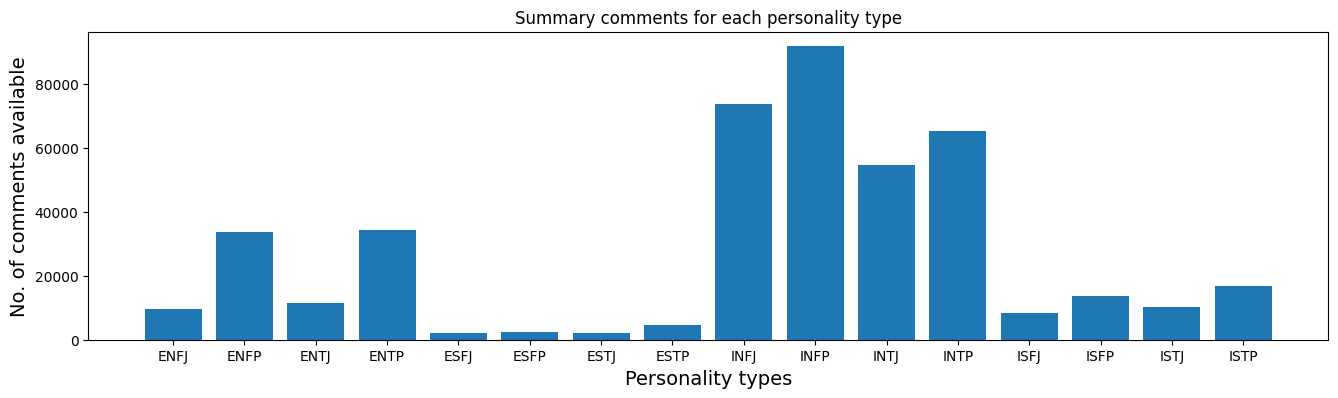

In [62]:
import matplotlib.pyplot as plot

plot.figure(figsize = (16,4))
plot.bar(np.array(groupSummary.index), height = groupSummary['comments'],)
plot.xlabel('Personality types', size = 14)
plot.ylabel('No. of comments available', size = 14)
plot.title('Summary comments for each personality type')

<AxesSubplot: xlabel='p_types', ylabel='words_per_comment'>

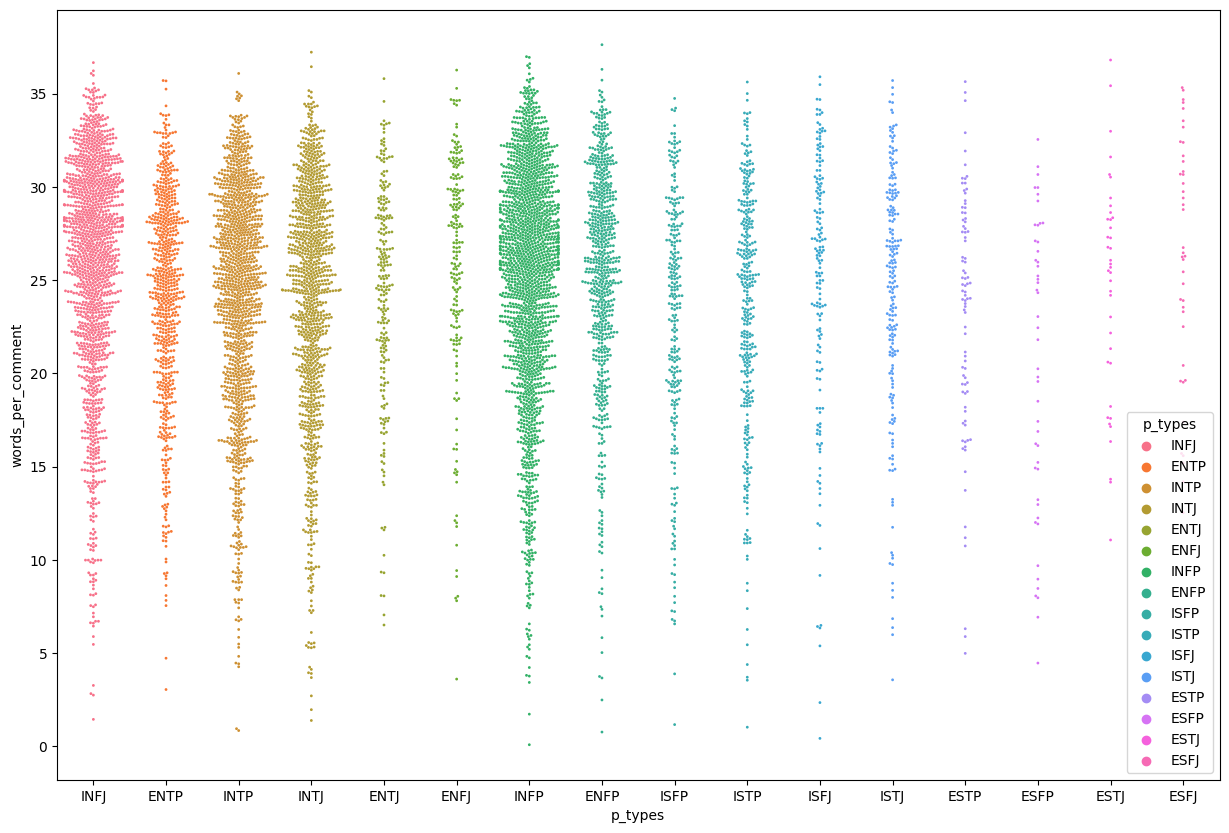

In [63]:
#making further analysis by generating additional features

myDataCopy = myData.copy()

#create a function that splits the words in the 50 comments of a user and calculates the variance of words-count in each row

def row_variance(row):
    
    #l = [len(i.split()) for i in row.split('|||')]
    l = []
    for i in row.split('|||'):
        l.append(len(i.split()))
    
    return np.var(l)
  

#this function counts the no of words per post out of the total 50 posts in the whole row
myDataCopy['words_per_comment'] = myDataCopy['comments'].apply(lambda x: len(x.split())/50)
myDataCopy['variance_of_word_counts'] = myDataCopy['comments'].apply(lambda x: row_variance(x))

plot.figure(figsize=(15,10))

import seaborn as sns
sns.swarmplot(data=myDataCopy, x = "p_types", y = "words_per_comment", hue = "p_types", size = 2)

<Figure size 1500x1000 with 0 Axes>

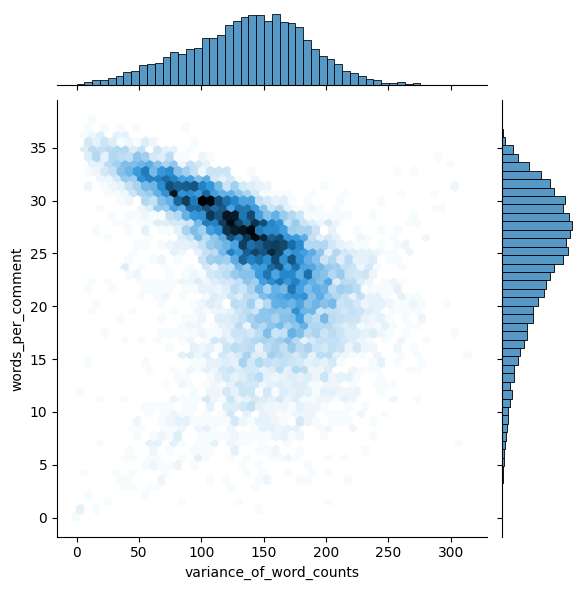

In [64]:
plot.figure(figsize = (15,10))
sns.jointplot(data=myDataCopy, x = "variance_of_word_counts", y = "words_per_comment",  kind="hex")

Text(0.5, 1.0, 'The Distribution of Lengths for all 50 Comments')

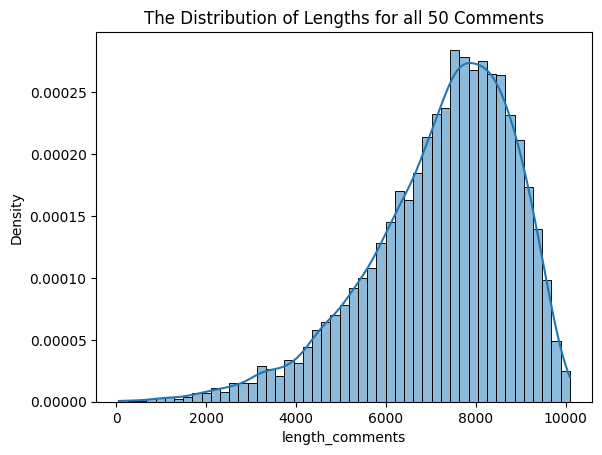

In [65]:
myDataCopy["length_comments"] = myDataCopy["comments"].apply(len)
sns.histplot(myDataCopy["length_comments"],stat = 'density',kde = True).set_title("The Distribution of Lengths for all 50 Comments")

In [66]:
list_of_wordsList = list(myDataCopy["comments"].apply(lambda x: x.split()))
wordsList = [y for x in list_of_wordsList for y in x]

from collections import Counter
Counter(wordsList).most_common(40)

[('I', 387957),
 ('to', 290168),
 ('the', 270699),
 ('a', 230918),
 ('and', 219498),
 ('of', 177853),
 ('is', 128804),
 ('you', 128750),
 ('that', 127221),
 ('in', 117263),
 ('my', 104561),
 ('it', 93101),
 ('for', 83057),
 ('have', 79784),
 ('with', 77131),
 ('but', 74729),
 ('be', 69317),
 ('are', 65034),
 ('like', 61390),
 ('not', 59496),
 ('an', 59020),
 ("I'm", 57339),
 ('on', 57062),
 ('was', 56146),
 ('me', 55488),
 ('as', 53310),
 ('this', 52601),
 ('just', 48292),
 ('about', 46305),
 ('think', 46229),
 ('or', 45724),
 ("don't", 44821),
 ('so', 42935),
 ('your', 40918),
 ('do', 40867),
 ('what', 37746),
 ('at', 37566),
 ('can', 37535),
 ('if', 37042),
 ('people', 35546)]

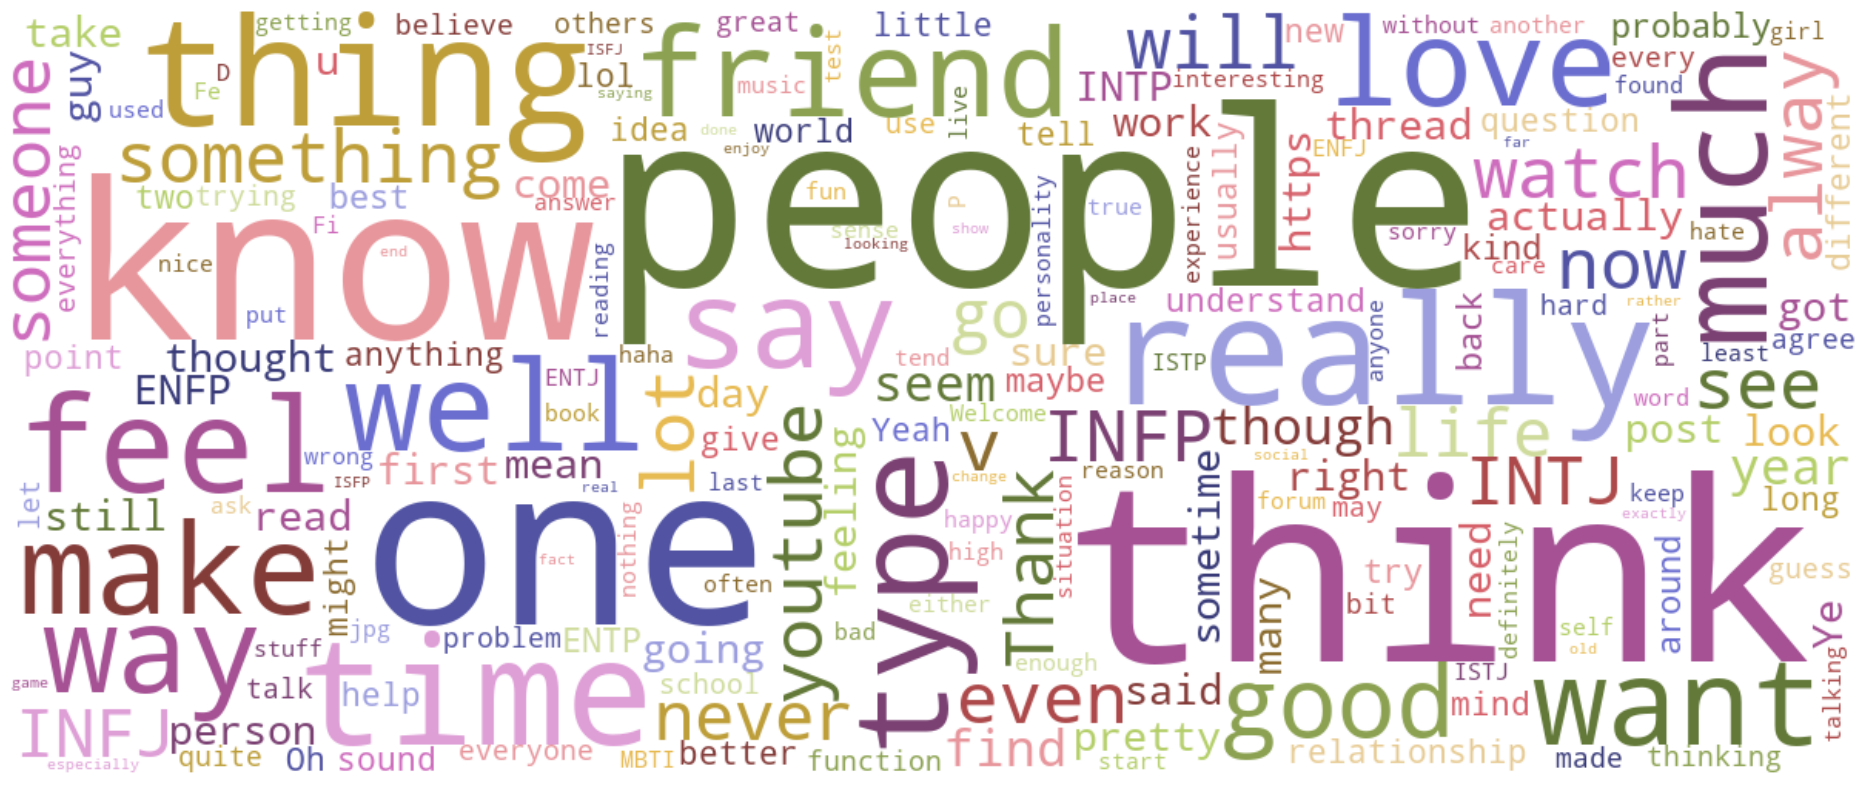

In [67]:
from wordcloud import wordcloud

wc = wordcloud.WordCloud(width=1200, height=500,collocations=False, background_color="white", colormap="tab20b").generate(" ".join(wordsList))
plot.figure(figsize=(25,10))
plot.imshow(wc,interpolation = 'bilinear')
_ = plot.axis("off")

In [68]:
import re

#this function helps us to clean the data (user comments) by removing web links,punctuations,very short words, accidental letters, y - target variables (personality types) included while commenting, etc.
def preprocess_comments(myData):
    comments = myData['comments'].copy()
    labels = myData['p_types'].copy()
    
    myData["comments"] = myData["comments"].apply(lambda x: re.sub(r'https?:\/\/.*?[\s+]', '', x.replace("|"," ") + " "))
    
    myData["comments"] = myData["comments"].apply(lambda x: re.sub(r'\.', ' EOSTokenDot ', x + " "))
    myData["comments"] = myData["comments"].apply(lambda x: re.sub(r'\?', ' EOSTokenQuest ', x + " "))
    myData["comments"] = myData["comments"].apply(lambda x: re.sub(r'!', ' EOSTokenExs ', x + " "))
    
    
    myData["comments"] = myData["comments"].apply(lambda x: re.sub(r'[\.+]', ".",x))

    myData["comments"] = myData["comments"].apply(lambda x: re.sub(r'[^\w\s]','',x))
    
    myData["comments"] = myData["comments"].apply(lambda x: re.sub(r'[^a-zA-Z\s]','',x))

    myData["comments"] = myData["comments"].apply(lambda x: x.lower())
   
    myData["comments"] = myData["comments"].apply(lambda x: re.sub(r'([a-z])\1{2,}[\s|\w]*','',x)) 

   
    myData["comments"] = myData["comments"].apply(lambda x: re.sub(r'(\b\w{0,3})?\b','',x)) 
    myData["comments"] = myData["comments"].apply(lambda x: re.sub(r'(\b\w{30,1000})?\b','',x))

    
    return myData


cleaned_Data = preprocess_comments(myData)


#Remove rows with very minimal word counts
print("Before row reduction: Number of comments", len(cleaned_Data)) 

min_words = 15
cleaned_Data["no. of. words"] = cleaned_Data["comments"].apply(lambda x: len(re.findall(r'\w+', x)))

cleaned_Data = cleaned_Data[cleaned_Data["no. of. words"] >= min_words]
print("After row reduction: Number of comments", len(cleaned_Data))

Before row reduction: Number of comments 8675
After row reduction: Number of comments 8466


In [69]:
cleaned_Data.head()

,p_types,comments,no. of. words
0,INFJ,enfp intj moments sportscenter plays...,430
1,ENTP,finding lack these posts very alarming eo...,803
2,INTP,good course which know thats bles...,253
3,INTJ,dear intp enjoyed conversation other eos...,777
4,ENTJ,youre fired eostokendot thats another silly...,402


In [70]:
cleaned_Data.tail()

,p_types,comments,no. of. words
8670,ISFP,ixfp just because always think cats doms...,564
8671,ENFP,eostokendot eostokendot eostokendot this t...,18
8672,INTP,many questions when these things eostokendo...,715
8673,INFP,very conflicted right when comes wanting ...,1184
8674,INFP,been long since have been personalitycafe...,877


In [71]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
pd.options.mode.chained_assignment = None  # default='warn'

cleaned_Data['p_type_encoded'] = encoder.fit_transform(cleaned_Data['p_types'])

In [72]:
import nltk 

#nltk.download('stopwords')

#Please kindly download "stopwords" package using the syntax above if not available on your system.

# OR kindly perform in your command prompt, the operation: python -m nltk.downloader all

from nltk.corpus import stopwords

print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [73]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer

vectorized_comments = CountVectorizer(analyzer = 'word', stop_words='english')

trainingData_processed = vectorized_comments.fit_transform(cleaned_Data.comments)

trainingData_processed.shape

(8466, 98555)

In [74]:
targetData_processed = cleaned_Data['p_type_encoded'] 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(trainingData_processed, targetData_processed, test_size=0.4, stratify=targetData_processed, random_state=42)
print ((X_train.shape),(y_train.shape),(X_test.shape),(y_test.shape))

(5079, 98555) (5079,) (3387, 98555) (3387,)


In [75]:
results_accuracy = {}
from xgboost import XGBClassifier

xg_boost = XGBClassifier()
xg_boost.fit(X_train,y_train)

Y_pred = xg_boost.predict(X_test)
predictions = [round(value) for value in Y_pred]


from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, multilabel_confusion_matrix, confusion_matrix
from sklearn.metrics import classification_report

accuracy = accuracy_score(y_test, predictions)
results_accuracy['XG_Boost'] = accuracy * 100.0
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 57.87%


In [76]:
from sklearn.linear_model import LogisticRegression

logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)

Y_pred = logistic_reg.predict(X_test)
predictions = [round(value) for value in Y_pred]


accuracy = accuracy_score(y_test, predictions)
results_accuracy['Logistic_Regression'] = accuracy * 100.0
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 58.22%


C:\Users\Harrison.Obidinnu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [77]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100, random_state = 1)
random_forest.fit(X_train, y_train)


Y_pred = random_forest.predict(X_test)
predictions = [round(value) for value in Y_pred]


accuracy = accuracy_score(y_test, predictions)
results_accuracy['Random Forest'] = accuracy * 100.0 
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 39.53%


In [78]:
#Testing out algorithms base on 70-30 train-test split

X_train, X_test, y_train, y_test = train_test_split(trainingData_processed, targetData_processed, test_size=0.3, stratify=targetData_processed, random_state=42)
print ((X_train.shape),(y_train.shape),(X_test.shape),(y_test.shape))


(5926, 98555) (5926,) (2540, 98555) (2540,)


In [79]:
results_accuracy = {}

xg_boost = XGBClassifier()
xg_boost.fit(X_train,y_train)

Y_pred = xg_boost.predict(X_test)
predictions = [round(value) for value in Y_pred]

accuracy = accuracy_score(y_test, predictions)
results_accuracy['XG_Boost'] = accuracy * 100.0
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 57.56%


In [80]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)

Y_pred = logistic_reg.predict(X_test)
predictions = [round(value) for value in Y_pred]


accuracy = accuracy_score(y_test, predictions)
results_accuracy['Logistic_Regression'] = accuracy * 100.0
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 58.27%


C:\Users\Harrison.Obidinnu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [164]:
myData2 = pd.read_csv('MBTI_DataSet.csv')
myData2

,p_types,comments
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...
...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...
8671,ENFP,'So...if this thread already exists someplace ...
8672,INTP,'So many questions when i do these things. I ...
8673,INFP,'I am very conflicted right now when it comes ...


In [165]:
def get_MBTI_types(records):
    p_type = records['p_types']
    I = 0; N = 0; T = 0; J = 0
    
    if p_type[0] == 'I':
        I = 1
    elif p_type[0] == 'E':
        I = 0
    
    if p_type[1] == 'N':
        N = 1
    elif p_type[1] == 'S':
        N = 0
    
    if p_type[2] == 'T':
        T = 1
    elif p_type[2] == 'F':
        T = 0
    
    if p_type[3] == 'J':
        J = 1
    elif p_type[3] == 'P':
        P = 0
    
    return pd.Series({'IE':I, 'NS':N , 'TF': T, 'JP': J }) 
    
myData2 = myData2.join(myData2.apply (lambda records: get_MBTI_types(records),axis=1))
myData2.head(5)

,p_types,comments,IE,NS,TF,JP
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,1,1,0,1
1,ENTP,'I'm finding the lack of me in these posts ver...,0,1,1,0
2,INTP,'Good one _____ https://www.youtube.com/wat...,1,1,1,0
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",1,1,1,1
4,ENTJ,'You're fired.|||That's another silly misconce...,0,1,1,1


In [166]:
MBTI_SummaryGroups = {}
MBTI_SummaryGroups['Introversion (I) -  Extroversion (E)'] = str(myData2['IE'].value_counts()[0]) + "-" + str(myData2['IE'].value_counts()[1])
MBTI_SummaryGroups['Intuition (N) - Sensing (S)'] = str(myData2['NS'].value_counts()[0]) + "-" + str(myData2['NS'].value_counts()[1])
MBTI_SummaryGroups['Thinking (T) - Feeling (F)'] = str(myData2['TF'].value_counts()[0]) + "-" + str(myData2['TF'].value_counts()[1])
MBTI_SummaryGroups['Judging (J) - Perceiving (P)'] = str(myData2['JP'].value_counts()[0]) + "-" + str(myData2['JP'].value_counts()[1])
MBTI_SummaryGroups

{'Introversion (I) -  Extroversion (E)': '1999-6676',
 'Intuition (N) - Sensing (S)': '1197-7478',
 'Thinking (T) - Feeling (F)': '4694-3981',
 'Judging (J) - Perceiving (P)': '5241-3434'}

In [171]:
from nltk.stem import WordNetLemmatizer
lemmatiser = WordNetLemmatizer()
The_stopWords = stopwords.words('english')
p_types_lowerCase = [p_types.lower() for p_types in p_types_unique]


def preprocess_comments2(myData2):
    
    comments_cleaned_List = []
    targetRows_processed_List = []
    
    for n in range(len(myData2.index)):
        
        comments_per_row1 = myData2.iloc[n,1]
       
        comments_per_row = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', comments_per_row1)
        comments_per_row = re.sub("[^a-zA-Z]", " ", comments_per_row)
        comments_per_row = re.sub(' +', ' ', comments_per_row).lower()
        comments_per_row = re.sub(r'([a-z])\1{2,}[\s|\w]*', '', comments_per_row)
        
        
        comments_per_row = " ".join([lemmatiser.lemmatize(words) for words in comments_per_row.split(' ') if words not in The_stopWords])
                 
        for p_types in p_types_lowerCase:
            comments_per_row = comments_per_row.replace(p_types,"") 
        
        comments_per_row_cleaned = comments_per_row
        
        comments_cleaned_List.append(comments_per_row_cleaned)
        
        
        
        targetRow_array = np.array(myData2.iloc[n:n+1,2:6])
        
        targetRow_array_1D = targetRow_array.flatten()
       
        targetRow_processed = encoder.fit_transform(targetRow_array_1D)
        
        targetRows_processed_List.append(targetRow_processed)
        
    
    return comments_cleaned_List, targetRows_processed_List


comments_cleaned_List, targetRows_processed_List = preprocess_comments2(myData2)
        
    
   
print("\nComments after Cleaning:\n\n", comments_cleaned_List[0])

print("\nMBTI Post after preprocessing:\n\n", targetRows_processed_List[0])



Comments after Cleaning:

    moment sportscenter top ten play prank life changing experience life repeat today may perc experience immerse last thing  friend posted facebook committing suicide next day rest peace hello  sorry hear distress natural relationship perfection time every moment existence try figure hard time time growth welcome stuff game set match prozac wellbrutin least thirty minute moving leg mean moving sitting desk chair weed moderation maybe try edible healthier alternative basically come three item determined type whichever type want would likely use given type cognitive function whatnot left thing moderation sims indeed video game good one note good one somewhat subjective completely promoting death given sim dear  favorite video game growing current favorite video game cool appears late sad someone everyone wait thought confidence good thing cherish time solitude b c revel within inner world whereas time workin enjoy time worry people always around yo  lady compl

In [172]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfIDF_Vectorizer = TfidfVectorizer(analyzer = 'word',max_features=1000,max_df=0.7,min_df=0.1)

trainingData_processed2 = tfIDF_Vectorizer.fit_transform(comments_cleaned_List).toarray()

trainingData_processed2.shape

(8675, 595)

In [173]:
print("X: 1st posts in tf-idf representation\n%s" % trainingData_processed2[0])

X: 1st posts in tf-idf representation
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.08105478 0.07066064
 0.         0.         0.         0.         0.         0.
 0.         0.04516864 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.05321691 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.0871647  0.         0.         0.
 0.         0.         0.         0.05506308 0.0708757  0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.16585935 0.         0.         0.09676192 0.
 0.         0.04970682 0.         0.         0.         0.
 0.07397056 0.         0.         0.         0.         0.
 0.       

In [174]:
MBTI_KeyList = list(MBTI_SummaryGroups.keys())

targetRows_processed_array = np.array(targetRows_processed_List)

targetColumns_processed_array = targetRows_processed_array

for mbti in range(len(MBTI_SummaryGroups)):
    
    mbtiColumn_processed = targetColumns_processed_array[:,mbti]
    
    X_train, X_test, y_train, y_test = train_test_split(trainingData_processed2, mbtiColumn_processed, test_size=0.30, random_state=7)
    
    
    xg_boost = XGBClassifier()
    xg_boost.fit(X_train,y_train)

    Y_pred = xg_boost.predict(X_test)
    predictions = [round(value) for value in Y_pred]

    accuracy = accuracy_score(y_test, predictions)
    
    
    
    print("%s Accuracy: %.2f%%" % (MBTI_KeyList[mbti], accuracy * 100.0))
    
    

Introversion (I) -  Extroversion (E) Accuracy: 63.08%
Intuition (N) - Sensing (S) Accuracy: 72.03%
Thinking (T) - Feeling (F) Accuracy: 68.00%
Judging (J) - Perceiving (P) Accuracy: 72.15%
